In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

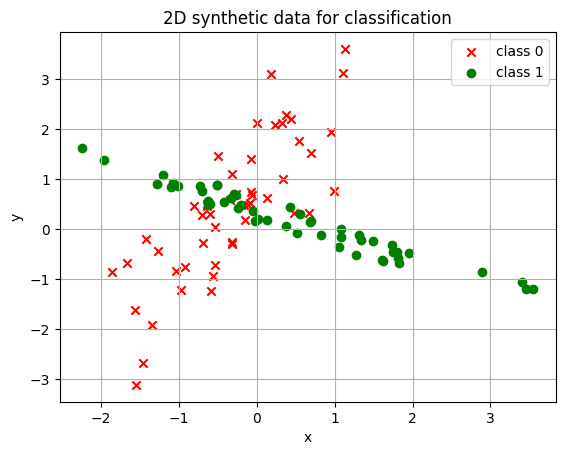

In [2]:
# load data
random_state = np.random.RandomState(0)
X, y = make_classification(
    n_samples=100, 
    n_features=2, 
    n_informative=2, 
    n_redundant=0, 
    n_classes=2, 
    n_clusters_per_class=1, 
    hypercube=False,
    random_state=random_state
)
_ = plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='r', marker='x', label='class 0')
_ = plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='g', marker='o', label='class 1')
_ = plt.title('2D synthetic data for classification')
_ = plt.grid(True)
_ = plt.xlabel('x')
_ = plt.ylabel('y')
_ = plt.legend(loc='best')


In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

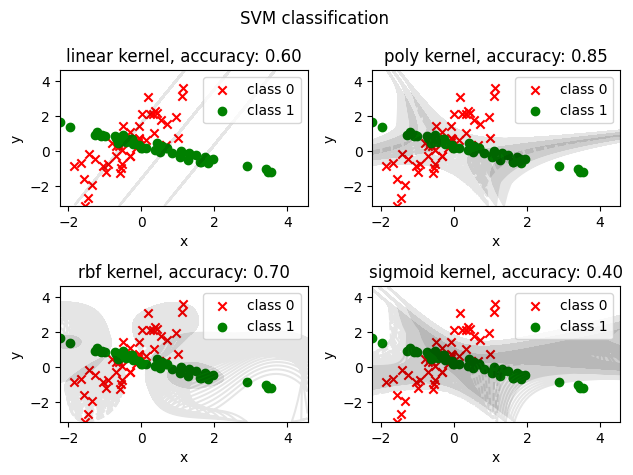

                      precision    recall  f1-score  support
linear 0               0.428571  1.000000  0.600000     6.00
linear 1               1.000000  0.428571  0.600000    14.00
linear accuracy        0.600000  0.600000  0.600000     0.60
linear macro avg       0.714286  0.714286  0.600000    20.00
linear weighted avg    0.828571  0.600000  0.600000    20.00
poly 0                 0.666667  1.000000  0.800000     6.00
poly 1                 1.000000  0.785714  0.880000    14.00
poly accuracy          0.850000  0.850000  0.850000     0.85
poly macro avg         0.833333  0.892857  0.840000    20.00
poly weighted avg      0.900000  0.850000  0.856000    20.00
rbf 0                  0.500000  1.000000  0.666667     6.00
rbf 1                  1.000000  0.571429  0.727273    14.00
rbf accuracy           0.700000  0.700000  0.700000     0.70
rbf macro avg          0.750000  0.785714  0.696970    20.00
rbf weighted avg       0.850000  0.700000  0.709091    20.00
sigmoid 0              0

In [4]:
# create meshgrid for decision boundary
xx = np.linspace(min(X[:, 0]), max(X[:, 0]) + 1, len(X_train))
yy = np.linspace(min([X[:, 1]]), max(X[:, 1]) + 1, len(y_train))
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# train models and evaluate
reports = {}
_, axes = plt.subplots(2, 2)
for row, col, kernel in [
    (0, 0, "linear"), 
    (0, 1, "poly"), 
    (1, 0, "rbf"), 
    (1, 1, "sigmoid")
]:
    if kernel == "poly":
        svr = SVC(kernel=kernel, degree=2).fit(X_train, y_train)
    else:
        svr = SVC(kernel=kernel).fit(X_train, y_train)

    y_pred = svr.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    reports.update({f"{kernel} {k}": v for k, v in report.items()})
    
    
    Z = svr.decision_function(xy).reshape(XX.shape)

    _ = axes[row, col].scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='r', marker='x', label='class 0')
    _ = axes[row, col].scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='g', marker='o', label='class 1')
    _ = axes[row, col].contour(XX, YY, Z, colors='k', levels=[-1,0,1], alpha=0.1)
    _ = axes[row, col].set_title(f'{kernel} kernel, accuracy: {report["accuracy"]:.2f}')
    _ = axes[row, col].set_xlabel('x')
    _ = axes[row, col].set_ylabel('y')
    _ = axes[row, col].legend(loc='best')

_ = plt.suptitle('SVM classification')
_ = plt.tight_layout()
_ = plt.show()

reports = pd.DataFrame(reports).T
print(reports)